# Project: Investigating Movie Revenue, Budget and Vote Averages Over Time 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### The data set being used in this project is originally from the TMDb (The Movie Database) and contains information about over 10,000 movies.  It was cleaned from the original data on Kaggle.com.   It contains extensive information about each movie, and the vote count and vote average come from people that have visited the Movie Database.  

### The first question: Does a higher budget always result in higher revenue and do certain years have higher budgets and/or higher revenues?

### The second question: How is vote average effected by variables such as release year, budget/revenue, and runtime of the movies?

In [1]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading my data and printing out a few lines. Also looking at how many columns and non-null values there are.

df = pd.read_csv('/Users/seanward/Desktop/Project 2 UDacity/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

   ##       By the looks of this data, I will not be using every column for my project.  I can easily drop columns that have lots of null values (homepage, tagline, keywords, production_companies). I can also drop columns that I am certain have no value for my project (id, imdb_id, popularity, cast, director, and overview).  This will make it much easier for me to look at the data with only what is prevelant to me.

## Data Cleaning

In [4]:
# Dropping columns that are not needed for my analysis.
df_2 =  df.drop(['id', 'imdb_id', 'popularity', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies'], axis = 1)

In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10866 non-null  int64  
 1   revenue         10866 non-null  int64  
 2   original_title  10866 non-null  object 
 3   runtime         10866 non-null  int64  
 4   genres          10843 non-null  object 
 5   release_date    10866 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 933.9+ KB


In [6]:
# Renaming "original_title" to just simply "title" 
df_2.rename(columns={'original_title': 'title'}, inplace=True)

# Confirm the renaming
df_2.head(1)

,budget,revenue,title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [7]:
# Checking the value counts for revenue_adj and budget_adj for 0 values (movies
# that do not have revenue/budgets information available).

df_2.revenue_adj.value_counts()

0.000000e+00    6016
1.438914e+07       2
5.766759e+07       2
1.000000e+06       2
2.093547e+08       2
                ... 
7.036068e+07       1
2.714497e+07       1
7.694895e+07       1
1.087002e+06       1
1.062776e+09       1
Name: revenue_adj, Length: 4840, dtype: int64

In [8]:
df_2.budget_adj.value_counts()

0.000000e+00    5696
1.016400e+07      17
2.103337e+07      17
2.000000e+07      16
4.605455e+06      15
                ... 
4.658819e+06       1
6.641668e+07       1
2.289547e+07       1
2.206182e+06       1
2.264205e+06       1
Name: budget_adj, Length: 2614, dtype: int64

In [9]:
# Over half the movies have zero values for revenue_adj and/or budget_adj!  
# I must create a new dataframe that drops all of the rows that have budget_adj/revenue_adj values of zero.

df_3 = df_2.loc[(df_2[['budget_adj', 'revenue_adj']] != 0).all(axis=1)]

In [10]:
# I have successfully created a dataframe with no null values.
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        3855 non-null   int64  
 1   revenue       3855 non-null   int64  
 2   title         3855 non-null   object 
 3   runtime       3855 non-null   int64  
 4   genres        3855 non-null   object 
 5   release_date  3855 non-null   object 
 6   vote_count    3855 non-null   int64  
 7   vote_average  3855 non-null   float64
 8   release_year  3855 non-null   int64  
 9   budget_adj    3855 non-null   float64
 10  revenue_adj   3855 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 361.4+ KB


In [11]:
# Double checking for zero values in budget_adj.  Success!

df_3.budget_adj.value_counts()

2.103337e+07    14
3.349690e+07    14
2.000000e+07    13
2.025573e+07    11
2.629171e+07    11
                ..
2.386885e+07     1
4.647239e+05     1
1.473348e+07     1
6.398027e+06     1
3.000000e+00     1
Name: budget_adj, Length: 2096, dtype: int64

In [12]:
# Verifying that there are no more null values.

df_3.isnull().sum()

budget          0
revenue         0
title           0
runtime         0
genres          0
release_date    0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

In [13]:
# Checking for duplicates and then dropping the duplicates.

sum(df_3.duplicated())

1

In [14]:
df_3.drop_duplicates()

,budget,revenue,title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...
10822,7500000,33736689,Who's Afraid of Virginia Woolf?,131,Drama,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
10828,3000000,13000000,Torn Curtain,128,Mystery|Thriller,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07
10829,4653000,6000000,El Dorado,120,Action|Western,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07
10835,12000000,20000000,The Sand Pebbles,182,Action|Adventure|Drama|War|Romance,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1:  Does a higher budget always result in higher revenue and do certain years have higher budgets and/or higher revenues?

In [15]:
# Looking at the descriptive statistics between variables to compare them all.
# I find that comparing budget and revenue shows that there is not much of a difference between the two until
# you look at the higher 50%.  For example, the lowest 25% has very similar budgets and revenues, while the highest
# 25% (shown here as 75%) is showing much higher revenues. 

df_3.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


In [16]:
df_rev = df_3.groupby('release_year')['revenue_adj'].mean()

In [17]:
# Sorting years in descending order by average adjusted revenue 
df_rev = df_rev.sort_values(ascending=False)

In [18]:
# Looking at the average adjused revenue by year shows that most of the highest adjusted revenues are from
# the 1960's and 1970's (the top 17 years).  The 21st century doesn't even show up until nearly the middle of the
# list.  This is a far different list than the adjusted budget which will be shown next.
df_rev

release_year
1965    6.340369e+08
1973    4.563339e+08
1975    3.805593e+08
1967    3.679869e+08
1977    3.563997e+08
1969    3.413599e+08
1964    3.300344e+08
1972    3.134604e+08
1970    2.808041e+08
1961    2.463622e+08
1974    2.449833e+08
1978    2.303062e+08
1979    2.217793e+08
1962    2.124740e+08
1963    2.094838e+08
1976    1.915661e+08
1960    1.902299e+08
1982    1.873466e+08
1989    1.576854e+08
1997    1.571064e+08
1971    1.558752e+08
1968    1.547889e+08
1994    1.547797e+08
1980    1.521029e+08
2015    1.506667e+08
1992    1.491386e+08
1990    1.464706e+08
2012    1.453737e+08
1995    1.453671e+08
2003    1.445738e+08
1983    1.405610e+08
1991    1.397153e+08
2002    1.375528e+08
2001    1.348360e+08
2014    1.343675e+08
1998    1.341499e+08
2000    1.308101e+08
1993    1.294898e+08
2004    1.294683e+08
1981    1.288629e+08
1999    1.280952e+08
2013    1.266280e+08
2009    1.262155e+08
1996    1.247852e+08
2010    1.218175e+08
1984    1.202694e+08
2007    1.188110e+08


In [19]:
df_bud = df_3.groupby('release_year')['budget_adj'].mean()

In [20]:
# Sorting years in descending order by average adjusted budget.

df_bud = df_bud.sort_values(ascending=False)
df_bud

release_year
1965    8.138583e+07
1963    7.252496e+07
1997    6.080297e+07
2000    5.780982e+07
1998    5.746289e+07
1999    5.549679e+07
2003    5.442667e+07
2001    5.319091e+07
2004    5.232857e+07
2002    5.160072e+07
1970    4.896551e+07
1996    4.821614e+07
1967    4.802007e+07
2010    4.744770e+07
2005    4.679254e+07
1995    4.629300e+07
2012    4.560943e+07
2013    4.455479e+07
2007    4.432667e+07
2006    4.425382e+07
2009    4.403133e+07
1966    4.335538e+07
1979    4.332191e+07
2008    4.316507e+07
1994    4.315594e+07
1991    4.210874e+07
2014    4.127475e+07
2015    4.123195e+07
2011    4.112172e+07
1962    4.062476e+07
1990    3.768030e+07
1968    3.757895e+07
1980    3.682018e+07
1992    3.557618e+07
1983    3.426817e+07
1964    3.408189e+07
1969    3.394782e+07
1993    3.355815e+07
1989    3.338586e+07
1978    3.267392e+07
1976    3.078131e+07
1960    3.068179e+07
1982    2.988812e+07
1985    2.948170e+07
1984    2.863928e+07
1961    2.818516e+07
1988    2.632559e+07


## I am noticing that many of the highest adjusted revenue years are from the 60's and 70's while the 21st century doesn't even show up until about the 24th position.  In terms of the adjusted budget, 8 of the top 10 positions are from between 1997 and 2004.  
## My theory for the 60's and 70's high adjusted revenue is that it is connected with the fact that tMDb is much more selective on which older movies it includes, so it tends to be the more successful ones.
## My theory for the higher adjusted budgets for 1997-2004 is that it is possible with the rise of the internet and interest in high tech movies that much more money was being invested in movies in general.  By the looks of the scattering of these years all over the spectrum in terms of adjusted revenue, the raised budgets didn't always seem to pay off for revenues.

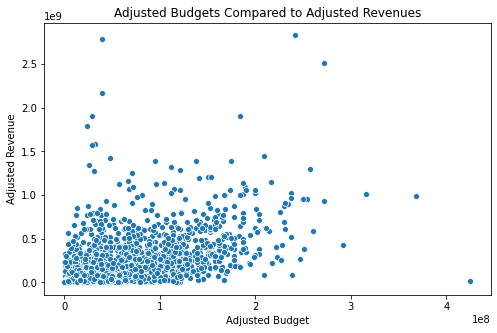

In [21]:
# Create a plot comparing Adjusted Budget with Adjusted Revenue.  There is no clear pattern because there are
# plenty of movies with a high budget but low revenue, and many with a low budget but high revenue.

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_3, x= "budget_adj", y= "revenue_adj")
plt.title("Adjusted Budgets Compared to Adjusted Revenues") 
plt.xlabel("Adjusted Budget") 
plt.ylabel("Adjusted Revenue")
plt.show();

## I decided to create a new column called "actual revenue" which subtracts the budget expense from revenue to show the actual money that these movies have made.  I thought it would be interesting to look at which years have a higher "actual revenue" and which have a lower one.

In [22]:
# Creating a new column that subtracts the budget from the revenue to create "actual revenue"

df_3['actual_revenue'] = df_3['revenue'] - df_3['budget']

<ipython-input-22-5710bd17ba15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['actual_revenue'] = df_3['revenue'] - df_3['budget']


In [23]:
# Grouping the mean of actual revenue data by year.

df_4 = df_3.groupby('release_year')['actual_revenue'].mean()

In [24]:
# Sorting the actual revenue by year in descending order.

df_4 = df_4.sort_values(ascending=False)

In [25]:
# Interesting to see that the seven highest "actual revenue" years by average are either in the 1970's or the 2010's.
# Perhaps those are eras where the top movies made loads of money, so they began to put more money into the budgets.
# I can see that the years directly after 1977 (the 4th biggest "actual revenue by average" year) are towards the
# middle of the bunch, and then the 80's were down near the bottom of the list.  It's like the studios struck gold
# but then ended up putting too much money into films as a reaction.

df_4

release_year
2015    1.189509e+08
2012    1.050433e+08
2014    1.010679e+08
1977    9.175308e+07
1975    8.980081e+07
1973    8.814051e+07
2013    8.768191e+07
2009    8.085808e+07
1965    7.985637e+07
2003    7.605087e+07
1994    7.587717e+07
2011    7.520952e+07
2010    7.436977e+07
1992    7.307634e+07
2008    7.091840e+07
2002    7.090228e+07
1997    7.089157e+07
2007    7.082487e+07
1989    7.066551e+07
1982    6.968294e+07
1995    6.923578e+07
2004    6.681977e+07
2001    6.629789e+07
1990    6.518689e+07
1993    6.355317e+07
1991    6.096243e+07
1979    5.939563e+07
1978    5.912353e+07
2000    5.764882e+07
1998    5.732767e+07
1972    5.715449e+07
2005    5.680646e+07
1999    5.545870e+07
1996    5.507705e+07
1969    5.171575e+07
2006    5.163491e+07
1974    5.004477e+07
1967    4.894882e+07
1983    4.855077e+07
1987    4.670754e+07
1981    4.400838e+07
1984    4.365329e+07
1980    4.356807e+07
1964    4.209691e+07
1976    4.196177e+07
1970    4.127909e+07
1985    4.065607e+07


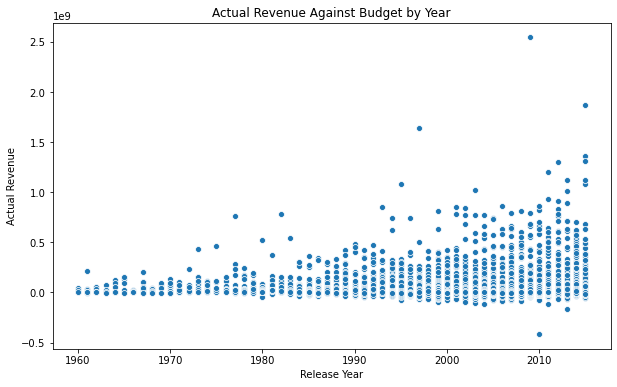

In [26]:
# Creating a scatterplot which shows actual revenue by release year.

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_3, x= "release_year", y= "actual_revenue")
plt.title("Actual Revenue Against Budget by Year") 
plt.xlabel("Release Year") 
plt.ylabel("Actual Revenue")
plt.show();

## As time goes by, there seems to be many more movies making a higher actual revenue, and also more movies that lost money as well (the ones that are in the negative).   As revenues seemed to really climb in the 90's, studios were also willing to put lots more money into their movies.  They were much more risky in terms of attempts to make money.  

## Research Question 2:  How is vote average effected by variables such as release year, budget/revenue, and runtime of the movies?

In [27]:
# Looking at the descriptive statistics between variables again for this second research question.
# I see that the mean vote average is about 6.17 which will be a good comparison point in terms of
# what the mean vote average is for every year.  I also see that the mean release year is 2001 showing that
# the database leans towards more modern films.  

df_3.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,actual_revenue
count,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03,3.855000e+03
mean,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08,7.045710e+07
std,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08,1.506085e+08
min,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07,-1.325776e+06
50%,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07,2.000718e+07
75%,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08,8.168326e+07
max,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


Text(0, 0.5, '# of Movies')

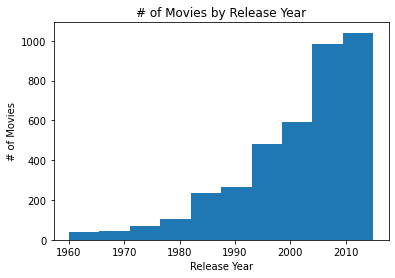

In [28]:
# Showing how many more movies in the database are from the mid-90's and later.
fig, ax = plt.subplots(1, 1)
ax.hist(df_3.release_year)
ax.set_title('# of Movies by Release Year')
ax.set_xlabel('Release Year')
ax.set_ylabel('# of Movies')

## It is clear from this histogram that the vast majority of the movies in the tMDb are from  the mid-2000's and later.  There are very few from 1960-1995.  Comparing around fifty movies from 1960-1965 to over a thousand for 2010-2015.  This is probably because they are much more selective about movies put out before this database (pre-2008 or so), and have entries for just about every modern movie.

Text(0, 0.5, '# of Movies')

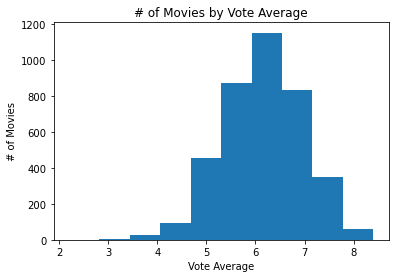

In [29]:
# Showing how many movies have certain vote averages.
fig, ax = plt.subplots(1, 1)
ax.hist(df_3.vote_average)
ax.set_title('# of Movies by Vote Average')
ax.set_xlabel('Vote Average')
ax.set_ylabel('# of Movies')

In [30]:
# Grouping the vote average mean by release year and sorting it in descending order.
# 1970-1975 really seems to be a critically golden era for cinema.  In terms of years that are above the mean of
# all vote averages there are no years more recent than 1985 (6.17 or higher vote average).  

df_vote = df.groupby('release_year')['vote_average'].mean()

df_vote = df_vote.sort_values(ascending=False)
df_vote

release_year
1973    6.703636
1972    6.535000
1971    6.420000
1970    6.417073
1974    6.395745
1975    6.390909
1968    6.379487
1961    6.374194
1962    6.343750
1976    6.340426
1963    6.329412
1960    6.325000
1979    6.308772
1967    6.242500
1982    6.241975
1964    6.211905
1965    6.194286
1985    6.177064
1981    6.165854
1980    6.160256
1977    6.147368
1978    6.130769
1987    6.128800
1966    6.128261
1992    6.081203
1989    6.070073
1995    6.056000
1993    6.050000
1999    6.032589
1991    6.014286
1986    6.004959
1984    6.003810
1990    5.993939
2010    5.990816
2004    5.988599
1997    5.988542
2002    5.973308
1983    5.971250
1998    5.970476
1988    5.965517
2007    5.964384
1969    5.961290
2011    5.958519
1994    5.942391
2006    5.941422
2003    5.930961
2008    5.930847
2014    5.920714
1996    5.900980
2001    5.896281
2015    5.885692
2000    5.882379
2013    5.880577
2005    5.866484
2009    5.856660
2012    5.799830
Name: vote_average, dtype: float64

In [31]:
# Looking at actual revenue in terms of by vote average, it does seem to be a trend that the higher the vote 
# average, the higher the actual revenue.  There are a few variations to this, but looking at these figures
# seems to verify a correlation.
df_voteavg = df_3.groupby('vote_average')['actual_revenue'].mean()

In [32]:
df_voteavg = df_voteavg.sort_values(ascending=False)
df_voteavg

vote_average
8.1    3.362431e+08
7.9    2.890923e+08
8.3    2.390664e+08
8.0    1.923533e+08
7.8    1.901513e+08
7.5    1.901165e+08
7.4    1.875883e+08
7.7    1.874818e+08
7.6    1.507334e+08
7.3    1.491223e+08
7.1    1.164866e+08
7.2    1.104292e+08
7.0    1.030018e+08
6.9    9.298901e+07
6.4    8.835853e+07
6.6    8.255311e+07
6.5    8.227606e+07
6.8    8.161998e+07
6.1    7.432075e+07
6.3    6.668123e+07
6.2    5.860772e+07
5.6    5.774294e+07
5.8    5.674607e+07
6.0    5.658720e+07
6.7    5.483138e+07
5.9    4.953186e+07
5.5    4.734879e+07
5.7    4.099069e+07
3.4    3.684187e+07
5.3    2.882613e+07
5.4    2.339650e+07
5.1    2.276722e+07
5.2    1.944547e+07
5.0    1.732002e+07
3.6    1.668139e+07
4.2    1.595562e+07
4.7    1.581402e+07
8.2    1.069309e+07
4.4    8.445347e+06
3.9    7.586951e+06
4.6    7.452268e+06
3.7    7.022091e+06
4.3    5.234695e+06
4.9    4.816227e+06
4.5    4.032079e+06
4.8    3.832716e+06
8.4    3.560196e+06
4.1   -3.492320e+06
3.8   -6.029859e+06
3.5   -

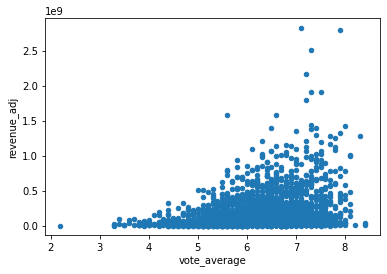

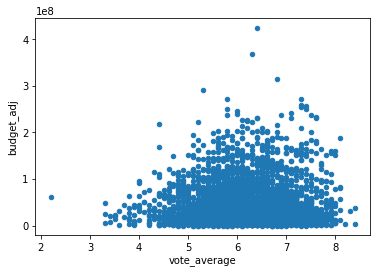

In [33]:
df_3.plot(x = 'vote_average', y = 'revenue_adj', kind= 'scatter');
df_3.plot(x= 'vote_average', y = 'budget_adj', kind= 'scatter');

In [34]:
df_voterun = df_3.groupby('vote_average')['runtime'].mean()

In [35]:
# It's pretty clear that there is a correlation between longer runtimes for movies and higher vote average.

df_voterun = df_voterun.sort_values(ascending=False)
df_voterun

vote_average
8.3    175.000000
8.1    163.666667
7.8    138.434783
7.9    130.352941
8.0    129.750000
7.7    124.000000
7.2    121.195652
7.3    120.433333
7.5    119.830189
7.4    119.306122
7.6    118.666667
7.1    118.537037
6.9    117.348148
8.4    115.000000
6.7    114.666667
7.0    114.414414
6.6    112.502732
6.8    112.148148
6.5    110.990431
6.4    110.887006
6.3    109.050279
6.1    108.635897
6.2    107.618812
6.0    107.515789
5.6    106.907143
5.8    105.414773
5.9    105.355932
8.2    105.000000
5.7    104.815068
5.5    104.024390
3.8    103.571429
5.3    100.948276
5.1    100.743243
4.6    100.615385
3.7    100.000000
4.9     99.826087
5.2     99.619565
5.4     99.513761
4.7     99.300000
3.3     99.000000
4.4     98.750000
4.8     97.880000
5.0     97.020833
3.5     97.000000
4.1     96.500000
4.3     95.636364
3.6     94.500000
4.0     94.285714
3.9     93.250000
4.5     91.840000
4.2     90.800000
3.4     88.000000
2.2     87.000000
Name: runtime, dtype: float64

<a id='conclusions'></a>
## Conclusions

> **Research Question 1:** Does a higher budget always result in higher revenue and do certain years have higher budgets and/or higher revenues?
    First off, I wanted to make sure I could compare budget and revenue in a way that takes into account the effect of inflation.  I thought comparing budget adjusted and revenue adjusted would be a good place to start.  After dropping all of the rows that had null values, the amount of rows went from 10,865 to 3,855 which just shows how many null values would have skewed the data.
    I wanted to look at all of the descriptive statistics, and focus the most on the mean, budget, revenue, budget_adj and revenue_adj numbers.  I found that the lowest 25% in terms of budgets and revenues are very similar to each other but that they highest 25% (shown as 75%) is showing much higher revenues than budgets. 
    I decided to group the adjusted revenues and adjusted budgets by the mean of each year.  I sorted them in descending order and found that the top 17 years for adjusted revenue was all in the 1960's and 1970's. My theory for this ties in with the fact that this database is much more selective about movies in the database from the 1960s and the 1970's.  I show more proof of this later on in this conclusion.
    Adjusted budgets have 8 of the top 10 positions between 1997 and 2004.  My theory behind this is that movies were starting to make much more money in the mid-1990's, so the studios poured much more money into the budgets to try to capitalize on the success (as we will see when we get to my created column "actual revenue" later in this summary).  Comparing adjusted budgets and adjusted revenues showed that there awas not a direct correlation between the two as seen on the scatterplot on In[21].  There are plenty of movies with a high adjusted budget and low adjusted revenue.  There are also plenty of movies with a high adjusted revenue and a low adjusted budget.  
    I decided to create a new column called "actual_revenue" which subtracted budget from revenue to show the actual sum that a movie made after subtracting the costs.  I grouped the actual revenue mean by release year and found that the seven highest actual revenue years were either in the 1970's and 2010's.  In the years directly after the highest actual revenue years, there seemed to be a big dip in actual revenues.  (as seen in Out[25]).  Looking at the scatterplot on In[26], there was a jump in actual revenue in the mid-1990's but that also started an era where there were many more movies with a negative actual revenue (meaning that the budget was higher than the revenue).  Studios seemed to be taking more risks with pouring money into the budget of movies.

> **Research Question 2:** How much of an effect does release year, budget/revenue and runtime of movies have on the vote average?
    I started with looking at the descriptive statistics again since I was comparing a number of different variables with a single variable (vote average).  I paid lots of attention to the mean/min/max vote average (6.16 mean with a range between 2.2 to 8.4), the mean release year (2001, showing a skew towards modern films), and the mean/min/max for actual revenue (showing a big range of numbers negative to positive).  
    On the bar chart for Out[28], I show just how big of a difference there is in how many movies in the database are from before 1990 and after 1990.  For example, there are 50 movies between 1960-1965 and over 1,000 for 2010-2015.  The next bar chart for Out[29] shows how many movies for each vote average.  The vast majority falls in between 5.0 and 7.0.  With the database being much more selective about older movies, it would make me think that the vote averages would be higher for them than for modern films. With Out[30], I organized the mean of the vote average for each year in descending order and found that the top 6 release years were all in a row from 1970-1975. A critically golden age for film. The top 14 years did not feature any year after 1979.
    What effect does budget and revenue have on the vote average?  I predicted that there would be a correlation, but not a completely clean one.  Sometimes the highest grossing films are not critically acclaimed, and sometimes there are cult movies that are acclaimed but didn't make much money.  Looking at Out[32], all of the top actual revenue movies were 7.0 and higher for vote average.  There are outliers like the 3.4 vote average which actually grossed more than the 8.2 vote average, but overall there is a correlation.
    Comparing vote average in terms of adjusted revenue vs. adjusted budget, there is a marked difference.  Looking at Out[33] and the two scatterplots comparing the two, there is definitely a positive trend line for vote average as aligned with revenue_adj.  For budget_adj it is much less clear.  I think it shows that movies that have a high revenue usually are critically acclaimed, but it is not as clear cut when a movie has a high budget.  
    My final analysis was the effect that runtime of movies has on vote average.  As I would have guessed, longer movies tend to be more critically acclaimed.  Lower rated movies tend to have shorter runtimes.  
    
> **Data Limitations:**
    In terms of limitations, I was disappointed that so many movies did not have revenue/revenue_adj/ budget/ budget_adj.  It makes it harder to paint a fuller picture with the data.  The data is also lacking in terms of the imbalance between older movies and newer movies.  There are also no votes from before this database was created.  So the data is not showing what ratings the audience gave movies from 1970 when they first came out, for example.  I would have liked to include genres as part of this analysis, but so many movies had way too many genres listed to really compare them.  I wish that maybe one (at the most, two) genres were chosen for each movie that way it would simplify it.  
    
> **List of Web Sites Used for Project:**
https://www.codegrepper.com
https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f
https://stackoverflow.com
https://www.geeksforgeeks.org/adding-labels-to-histogram-bars-in-matplotlib/
https://ipython.readthedocs.io/en/stable/interactive/magics.html
https://www.datasciencemadesimple.com/string-split-in-column-of-dataframe-in-pandas-python-2/
https://realpython.com/lessons/slicing-and-dicing-pandas-dataframe/
https://realpython.com/python-data-cleaning-numpy-pandas/